# The Landscape of Loss: A Visual Guide to Gradient Descent

**Gradient Descent** is the workhorse of modern machine learning. It is the algorithm that allows neural networks to learn, finding the optimal parameters to minimize error.

In this interactive article, we will explore the geometry of optimization. We will visualize what it means for a problem to be **Convex** or **Non-Convex**, and see how Gradient Descent acts as a hiker navigating these mathematical terrains.

## 1. The Terrain: Convexity vs. Non-Convexity

Before we optimize, we must understand the landscape. 

> **The Intuition**: Imagine a hiking trail.
> *   A **Convex** landscape is like a giant bowl. No matter where you are dropped, if you walk downhill, you will eventually reach the very bottom (the Global Minimum).
> *   A **Non-Convex** landscape is like a jagged mountain range with many peaks and valleys. If you walk downhill, you might get stuck in a small valley (a Local Minimum) and miss the deepest canyon (the Global Minimum) nearby.

Let's visualize this mathematically.

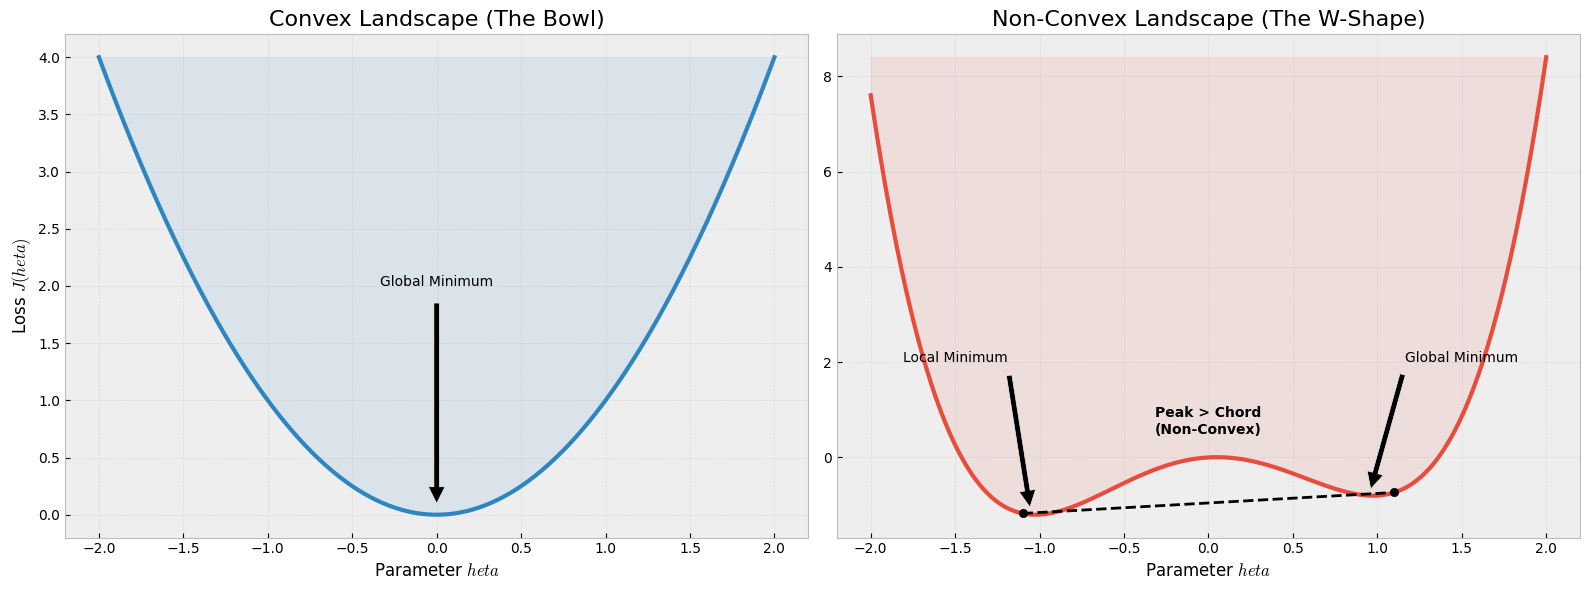

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Set a professional style
plt.style.use('bmh')

# 1. Define the Functions
def f_convex(x):
    return x**2

def f_non_convex(x):
    # The "W" shape: x^4 - 2x^2 + 0.5x (added slight tilt)
    return x**4 - 2*x**2 + 0.2*x

# 2. Prepare Data
x = np.linspace(-2, 2, 400)
y_convex = f_convex(x)
y_non_convex = f_non_convex(x)

# 3. Create the Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Convex ---
axes[0].plot(x, y_convex, color='#2E86C1', linewidth=3, label='$f(x)=x^2$')
axes[0].fill_between(x, y_convex, max(y_convex), color='#2E86C1', alpha=0.1)
axes[0].set_title("Convex Landscape (The Bowl)", fontsize=16)
axes[0].set_xlabel("Parameter $\theta$", fontsize=12)
axes[0].set_ylabel("Loss $J(\theta)$", fontsize=12)
axes[0].grid(True, alpha=0.3)
# Annotation for Global Min
axes[0].annotate('Global Minimum', xy=(0, 0), xytext=(0, 2), 
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# --- Plot 2: Non-Convex ---
axes[1].plot(x, y_non_convex, color='#E74C3C', linewidth=3, label='$f(x)=x^4 - 2x^2 + 0.2x$')
axes[1].fill_between(x, y_non_convex, max(y_non_convex), color='#E74C3C', alpha=0.1)
axes[1].set_title("Non-Convex Landscape (The W-Shape)", fontsize=16)
axes[1].set_xlabel("Parameter $\theta$", fontsize=12)
axes[1].grid(True, alpha=0.3)

# Illustrate the "Convexity Test" failure
# Connect two points (-1.2 and 1.2) to show the line goes BELOW the function peak
x1, x2 = -1.1, 1.1
y1, y2 = f_non_convex(x1), f_non_convex(x2)
axes[1].plot([x1, x2], [y1, y2], 'k--', linewidth=2, label='Chord Test (Fail)')
axes[1].scatter([x1, x2], [y1, y2], color='black', zorder=5)
axes[1].text(0, 0.5, "Peak > Chord\n(Non-Convex)", ha='center', color='black', fontsize=10, fontweight='bold')

axes[1].annotate('Local Minimum', xy=(-1.05, f_non_convex(-1.05)), xytext=(-1.5, 2), 
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
axes[1].annotate('Global Minimum', xy=(0.95, f_non_convex(0.95)), xytext=(1.5, 2), 
             arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.tight_layout()
plt.show()

### Why this matters

In the **"W" landscape** (non-convex), Gradient Descent is like a hiker in the fog. 
*   If the hiker starts on the left side, they will slide down into the left valley and stop. 
*   They have no way of knowing that a deeper, better valley exists on the right side. 
*   They are stuck in a **Local Minimum**.

In the **Convex landscape**, there is only one valley. No matter where you start, you finish at the Global Minimum.

## 2. The Mathematical Compass: Derivatives

How does the hiker know which way is down? They feel the slope of the ground under their feet.

In calculus, this slope is the **Derivative**.

*   If the slope is **positive** (uphill to the right), we step **left**.
*   If the slope is **negative** (downhill to the right), we step **right**.

The formula for the update step is:

$$ \theta_{new} = \theta_{old} - \alpha \cdot \frac{dJ}{d\theta} $$

Where:
*   $\theta$: The parameter we are tuning (position of hiker).
*   $\alpha$: The **Learning Rate** (size of the step).
*   $\frac{dJ}{d\theta}$: The Gradient (slope).

In [10]:
def gradient_descent(start_x, learning_rate, n_iterations, grad_func):
    x = start_x
    history = [x]
    for _ in range(n_iterations):
        grad = grad_func(x)
        x = x - learning_rate * grad
        history.append(x)
    return np.array(history)

# Derivative of our Non-Convex Function: f(x) = x^4 - 2x^2 + 0.2x
# f'(x) = 4x^3 - 4x + 0.2
def d_non_convex(x):
    return 4*x**3 - 4*x + 0.2

## 3. Visualizing the Descent: The Trap of Local Minima

Let's simulate two hikers starting at different positions on our "W" shaped mountain.

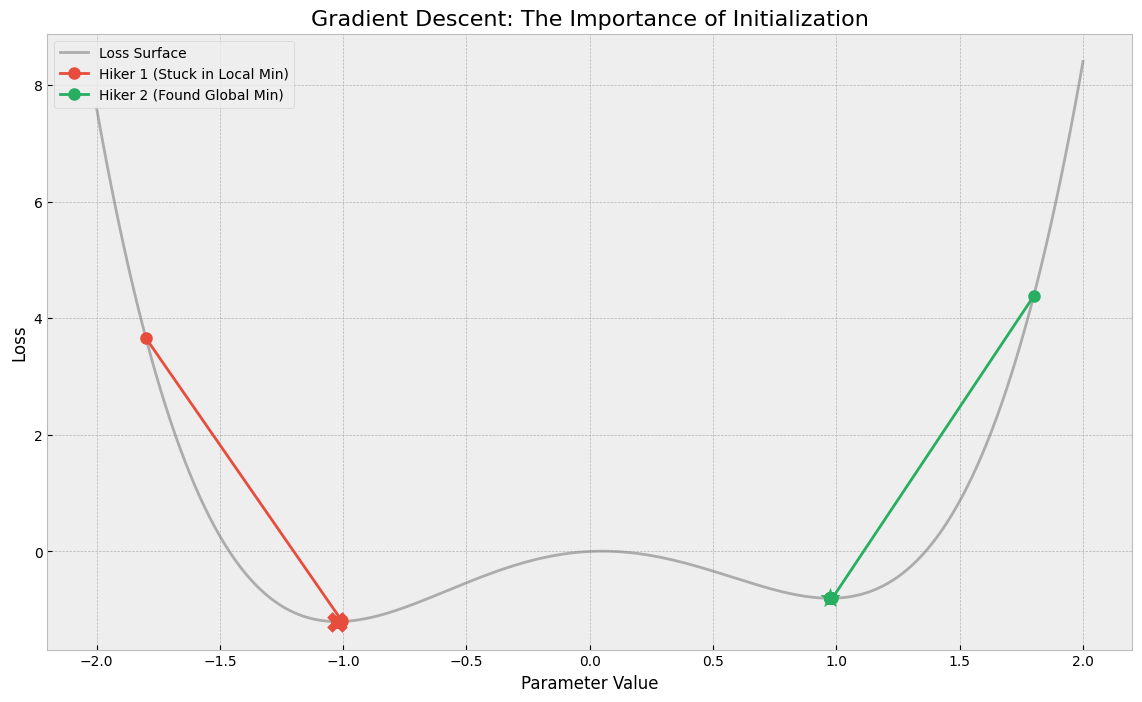

In [11]:
# Run Gradient Descent from two different starting points
learning_rate = 0.05
steps = 20

# Hiker 1: Starts on the left (Unlucky)
path_1 = gradient_descent(start_x=-1.8, learning_rate=learning_rate, n_iterations=steps, grad_func=d_non_convex)

# Hiker 2: Starts on the right (Lucky)
path_2 = gradient_descent(start_x=1.8, learning_rate=learning_rate, n_iterations=steps, grad_func=d_non_convex)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(x, y_non_convex, color='gray', alpha=0.6, label='Loss Surface')

# Plot Hiker 1 Path
plt.plot(path_1, f_non_convex(path_1), 'o-', color='#E74C3C', label='Hiker 1 (Stuck in Local Min)', markersize=8)
plt.scatter(path_1[-1], f_non_convex(path_1[-1]), color='#E74C3C', s=200, marker='X', zorder=10)

# Plot Hiker 2 Path
plt.plot(path_2, f_non_convex(path_2), 'o-', color='#27AE60', label='Hiker 2 (Found Global Min)', markersize=8)
plt.scatter(path_2[-1], f_non_convex(path_2[-1]), color='#27AE60', s=200, marker='*', zorder=10)

plt.title("Gradient Descent: The Importance of Initialization", fontsize=16)
plt.xlabel("Parameter Value", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 4. Advanced Visualization: The 2D Contour Map

Real-world machine learning models have millions of parameters, not just one. While we can't visualize 1,000,000 dimensions, we can visualize 2 dimensions to get a better intuition.

Let's look at a 2D convex function (a 3D bowl) from above. This is called a **Contour Plot**.

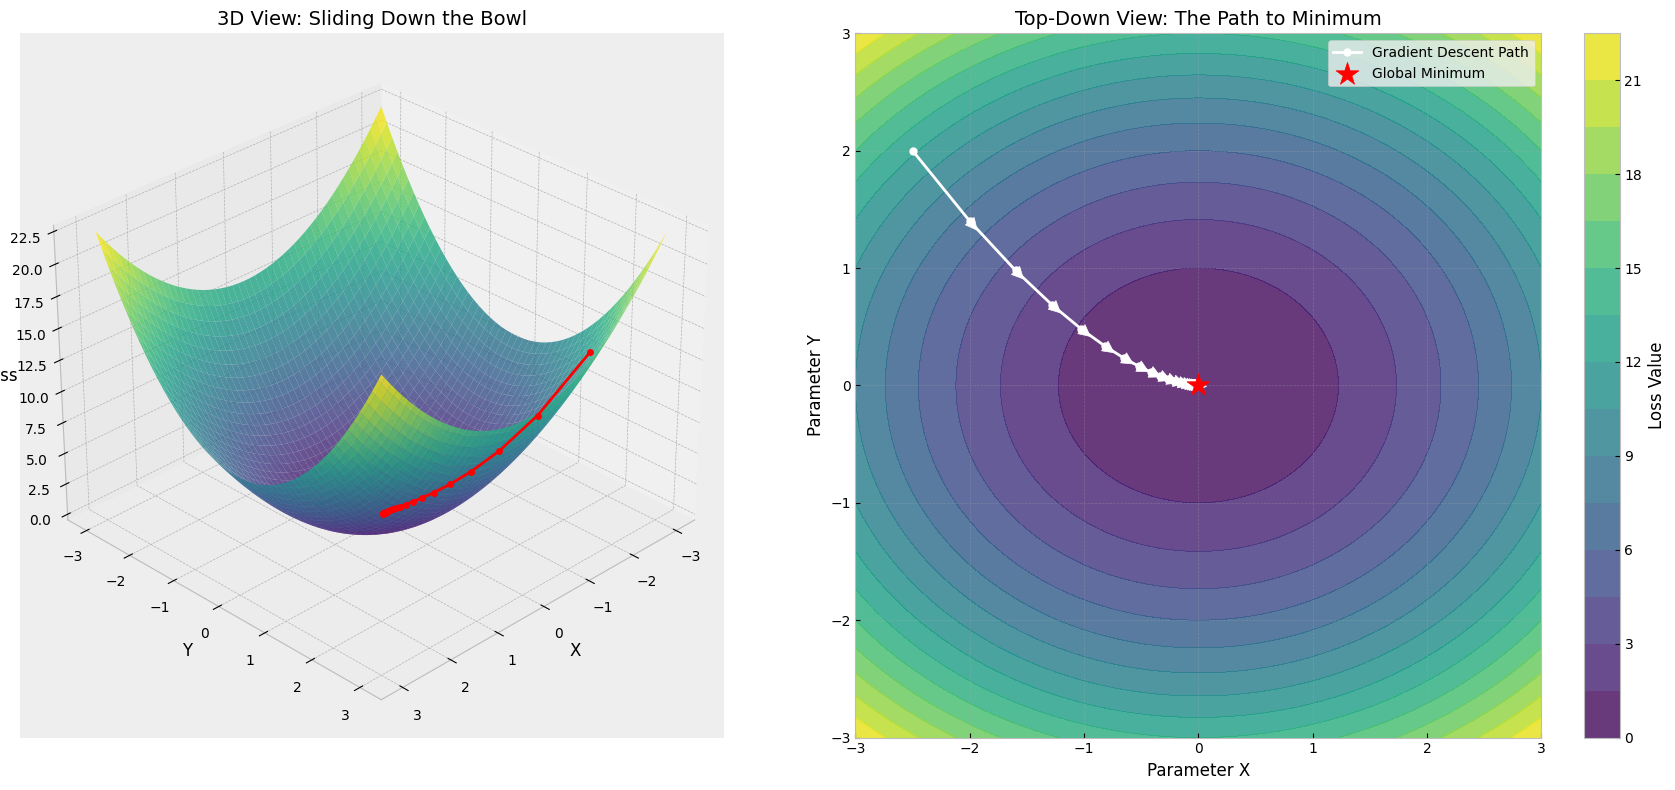

In [12]:
# Define a 2D Convex Function: f(x, y) = x^2 + y^2
def f_2d(x, y):
    return x**2 + 1.5*y**2  # Slightly elongated bowl

# Gradients for x and y
def grad_f_2d(x, y):
    return 2*x, 3*y

# Gradient Descent in 2D
def gradient_descent_2d(start_x, start_y, lr, steps):
    path = [(start_x, start_y)]
    x, y = start_x, start_y
    for _ in range(steps):
        gx, gy = grad_f_2d(x, y)
        x -= lr * gx
        y -= lr * gy
        path.append((x, y))
    return np.array(path)

# Generate grid for contour plot
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f_2d(X, Y)

# Simulate Descent
path = gradient_descent_2d(start_x=-2.5, start_y=2.0, lr=0.1, steps=20)

# --- 3D and Contour Visualization ---
fig = plt.figure(figsize=(18, 8))

# Subplot 1: 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.plot(path[:,0], path[:,1], f_2d(path[:,0], path[:,1]), color='red', marker='o', markersize=4, linewidth=2, zorder=10)
ax1.set_title("3D View: Sliding Down the Bowl", fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Loss')
ax1.view_init(elev=30, azim=45)

# Subplot 2: 2D Contour Map
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar(contour, ax=ax2, label='Loss Value')

# Plot the path
ax2.plot(path[:,0], path[:,1], color='white', marker='o', markersize=5, linestyle='-', linewidth=2, label='Gradient Descent Path')
ax2.scatter(0, 0, color='red', marker='*', s=300, label='Global Minimum', zorder=10)

# Add arrows to show direction
for i in range(len(path)-1):
    ax2.arrow(path[i,0], path[i,1], path[i+1,0]-path[i,0], path[i+1,1]-path[i,1], 
              head_width=0.1, head_length=0.1, fc='white', ec='white')

ax2.set_title("Top-Down View: The Path to Minimum", fontsize=14)
ax2.set_xlabel('Parameter X')
ax2.set_ylabel('Parameter Y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. The Effect of Learning Rate

The **Learning Rate** ($\alpha$) determines how big of a step we take. 
*   **Small $\alpha$**: Tiny steps. Safe, but takes forever to reach the bottom.
*   **Large $\alpha$**: Huge steps. Fast, but might overshoot the bottom and bounce around.
*   **Optimal $\alpha$**: Efficient steps that converge quickly.

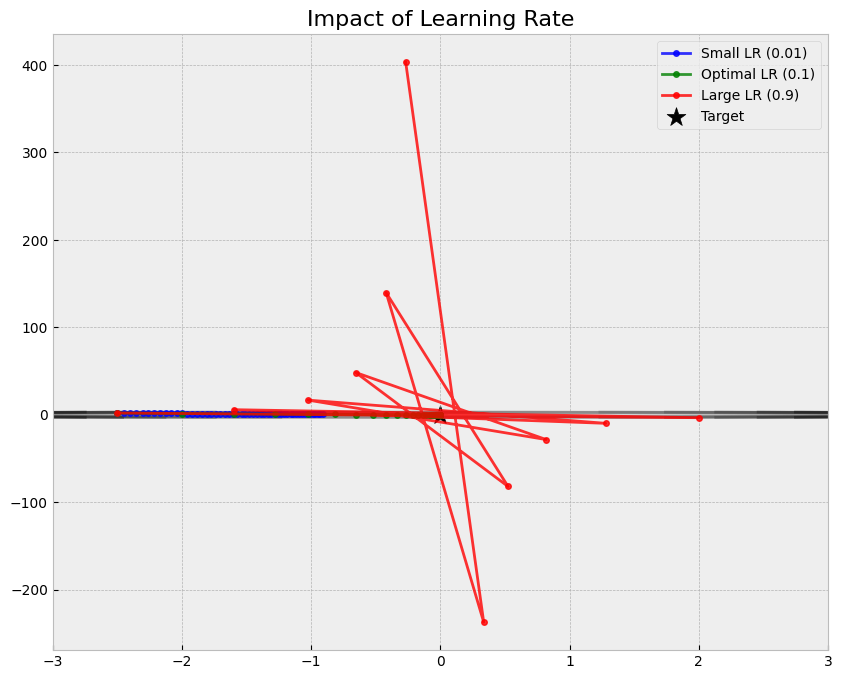

In [13]:
paths = {
    'Small LR (0.01)': gradient_descent_2d(-2.5, 2.0, 0.01, 50),
    'Optimal LR (0.1)': gradient_descent_2d(-2.5, 2.0, 0.1, 50),
    'Large LR (0.9)': gradient_descent_2d(-2.5, 2.0, 0.9, 10)
}

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='Greys', alpha=0.5)

colors = {'Small LR (0.01)': 'blue', 'Optimal LR (0.1)': 'green', 'Large LR (0.9)': 'red'}

for name, p in paths.items():
    plt.plot(p[:,0], p[:,1], marker='o', markersize=4, label=name, color=colors[name], alpha=0.8)

plt.title("Impact of Learning Rate", fontsize=16)
plt.scatter(0, 0, color='black', marker='*', s=200, label='Target')
plt.legend()
plt.grid(True)
plt.show()